# MEAN SHIFT

# Setup
Let us import the required modules.

In [1]:
from src.utilities.dataset import load_data
from src.models.clustering import MeanShiftEvaluation
# from src.models.dataset import DataClusterSplit

## Load Data


In [2]:
data = load_data(reduced=True)
data

Loading /Users/a/GitHub/clustering/src/data/red_x_pixels.csv
Loading /Users/a/GitHub/clustering/src/data/red_y_labels.csv


[Length: 14000; Features: 784]

## Tuning

In [3]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    # n_components=[25, 50],
    # hyperparam_vals=[0.5, 0.7]
    n_components=[2, 5, 10, 15, 25, 50, 100, 150, 200],
    hyperparam_vals=[0.1, 0.3, 0.5, 0.7, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0]
)
# todo: do something about loading saved files, by calling a function and directly populating the variables

In [ ]:
mean_shift_evaluation.load_results()

In [4]:
%%time
# mean_shift_evaluation.evaluate()

  0%|          | 0/9 [00:00<?, ?it/s]

Processing PCA dimension: 2


  0%|          | 0/10 [00:00<?, ?it/s]

PCA dimension: 2 - bandwidth value: 0.1
PCA dimension: 2 - bandwidth value: 0.3
PCA dimension: 2 - bandwidth value: 0.5
PCA dimension: 2 - bandwidth value: 0.7
PCA dimension: 2 - bandwidth value: 1.0
PCA dimension: 2 - bandwidth value: 2.0
PCA dimension: 2 - bandwidth value: 5.0
PCA dimension: 2 - bandwidth value: 10.0
PCA dimension: 2 - bandwidth value: 25.0
PCA dimension: 2 - bandwidth value: 50.0

Processing PCA dimension: 5


  0%|          | 0/10 [00:00<?, ?it/s]

PCA dimension: 5 - bandwidth value: 0.1
PCA dimension: 5 - bandwidth value: 0.3
PCA dimension: 5 - bandwidth value: 0.5
PCA dimension: 5 - bandwidth value: 0.7
PCA dimension: 5 - bandwidth value: 1.0
PCA dimension: 5 - bandwidth value: 2.0
PCA dimension: 5 - bandwidth value: 5.0
PCA dimension: 5 - bandwidth value: 10.0
PCA dimension: 5 - bandwidth value: 25.0
PCA dimension: 5 - bandwidth value: 50.0

Processing PCA dimension: 10


  0%|          | 0/10 [00:00<?, ?it/s]

PCA dimension: 10 - bandwidth value: 0.1
PCA dimension: 10 - bandwidth value: 0.3
PCA dimension: 10 - bandwidth value: 0.5
PCA dimension: 10 - bandwidth value: 0.7
PCA dimension: 10 - bandwidth value: 1.0
PCA dimension: 10 - bandwidth value: 2.0
PCA dimension: 10 - bandwidth value: 5.0
PCA dimension: 10 - bandwidth value: 10.0
PCA dimension: 10 - bandwidth value: 25.0
PCA dimension: 10 - bandwidth value: 50.0

Processing PCA dimension: 15


  0%|          | 0/10 [00:00<?, ?it/s]

PCA dimension: 15 - bandwidth value: 0.1
PCA dimension: 15 - bandwidth value: 0.3
PCA dimension: 15 - bandwidth value: 0.5
PCA dimension: 15 - bandwidth value: 0.7
PCA dimension: 15 - bandwidth value: 1.0
PCA dimension: 15 - bandwidth value: 2.0
PCA dimension: 15 - bandwidth value: 5.0
PCA dimension: 15 - bandwidth value: 10.0
PCA dimension: 15 - bandwidth value: 25.0
PCA dimension: 15 - bandwidth value: 50.0

Processing PCA dimension: 25


  0%|          | 0/10 [00:00<?, ?it/s]

PCA dimension: 25 - bandwidth value: 0.1
PCA dimension: 25 - bandwidth value: 0.3
PCA dimension: 25 - bandwidth value: 0.5
PCA dimension: 25 - bandwidth value: 0.7
PCA dimension: 25 - bandwidth value: 1.0
PCA dimension: 25 - bandwidth value: 2.0
PCA dimension: 25 - bandwidth value: 5.0
PCA dimension: 25 - bandwidth value: 10.0
PCA dimension: 25 - bandwidth value: 25.0
PCA dimension: 25 - bandwidth value: 50.0

Processing PCA dimension: 50


  0%|          | 0/10 [00:00<?, ?it/s]

PCA dimension: 50 - bandwidth value: 0.1
PCA dimension: 50 - bandwidth value: 0.3
PCA dimension: 50 - bandwidth value: 0.5
PCA dimension: 50 - bandwidth value: 0.7
PCA dimension: 50 - bandwidth value: 1.0
PCA dimension: 50 - bandwidth value: 2.0
PCA dimension: 50 - bandwidth value: 5.0
PCA dimension: 50 - bandwidth value: 10.0
PCA dimension: 50 - bandwidth value: 25.0
PCA dimension: 50 - bandwidth value: 50.0

Processing PCA dimension: 100


  0%|          | 0/10 [00:00<?, ?it/s]

PCA dimension: 100 - bandwidth value: 0.1
PCA dimension: 100 - bandwidth value: 0.3
PCA dimension: 100 - bandwidth value: 0.5
PCA dimension: 100 - bandwidth value: 0.7
PCA dimension: 100 - bandwidth value: 1.0
PCA dimension: 100 - bandwidth value: 2.0
PCA dimension: 100 - bandwidth value: 5.0
PCA dimension: 100 - bandwidth value: 10.0
PCA dimension: 100 - bandwidth value: 25.0
PCA dimension: 100 - bandwidth value: 50.0

Processing PCA dimension: 150


  0%|          | 0/10 [00:00<?, ?it/s]

PCA dimension: 150 - bandwidth value: 0.1
PCA dimension: 150 - bandwidth value: 0.3
PCA dimension: 150 - bandwidth value: 0.5
PCA dimension: 150 - bandwidth value: 0.7
PCA dimension: 150 - bandwidth value: 1.0
PCA dimension: 150 - bandwidth value: 2.0
PCA dimension: 150 - bandwidth value: 5.0
PCA dimension: 150 - bandwidth value: 10.0
PCA dimension: 150 - bandwidth value: 25.0
PCA dimension: 150 - bandwidth value: 50.0

Processing PCA dimension: 200


  0%|          | 0/10 [00:00<?, ?it/s]

PCA dimension: 200 - bandwidth value: 0.1
PCA dimension: 200 - bandwidth value: 0.3
PCA dimension: 200 - bandwidth value: 0.5
PCA dimension: 200 - bandwidth value: 0.7
PCA dimension: 200 - bandwidth value: 1.0
PCA dimension: 200 - bandwidth value: 2.0
PCA dimension: 200 - bandwidth value: 5.0
PCA dimension: 200 - bandwidth value: 10.0
PCA dimension: 200 - bandwidth value: 25.0
PCA dimension: 200 - bandwidth value: 50.0

Saving /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result.json
Saving /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result_bestmodels.pkl
Saving /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_bestmodel.pkl
CPU times: user 44min 55s, sys: 2min 45s, total: 47min 41s
Wall time: 2h 44min 17s


In [6]:
mean_shift_evaluation.results()

{2: {0.1: {'score': 0.6569306174930862,
   'n_clusters': 3,
   'time': 272.9560776979997},
  0.3: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 163.48173109300114},
  0.5: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 43.22806429300181},
  0.7: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 25.402802053002233},
  1.0: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 26.753334401000757},
  2.0: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 37.19317612600571},
  5.0: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 24.071552215005795},
  10.0: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 22.811907060997328},
  25.0: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 20.244190899997193},
  50.0: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 24.674487702999613}},
 5: {0.1: {'score': 0.9045258028634698,
   'n_clusters': 1222,
   'time': 120.07968930099742},
  

In [7]:
mean_shift_evaluation.results_bestmodels()

{2: {'model': MeanShift(bandwidth=0.1, n_jobs=-1),
  'bandwidth': 0.1,
  'score': 0.6569306174930862,
  'n_clusters': 3,
  'time': 272.9560776979997},
 5: {'model': MeanShift(bandwidth=0.1, n_jobs=-1),
  'bandwidth': 0.1,
  'score': 0.9045258028634698,
  'n_clusters': 1222,
  'time': 120.07968930099742},
 10: {'model': MeanShift(bandwidth=0.1, n_jobs=-1),
  'bandwidth': 0.1,
  'score': 0.9001915442939802,
  'n_clusters': 11895,
  'time': 48.687647931001266},
 15: {'model': MeanShift(bandwidth=0.3, n_jobs=-1),
  'bandwidth': 0.3,
  'score': 0.9052816425663057,
  'n_clusters': 1535,
  'time': 139.49104405300022},
 25: {'model': MeanShift(bandwidth=0.3, n_jobs=-1),
  'bandwidth': 0.3,
  'score': 0.9018544691967794,
  'n_clusters': 9196,
  'time': 80.41108398600045},
 50: {'model': MeanShift(bandwidth=0.7, n_jobs=-1),
  'bandwidth': 0.7,
  'score': 0.9038645209351689,
  'n_clusters': 2825,
  'time': 212.90830919099972},
 100: {'model': MeanShift(bandwidth=0.7, n_jobs=-1),
  'bandwidth': 0.

In [5]:
mean_shift_evaluation.best_model()

{'model': MeanShift(bandwidth=1.0, n_jobs=-1),
 'n_components': 150,
 'bandwidth': 1.0,
 'score': 0.9091065178124969,
 'n_clusters': 11139,
 'time': 222.4257713410043}

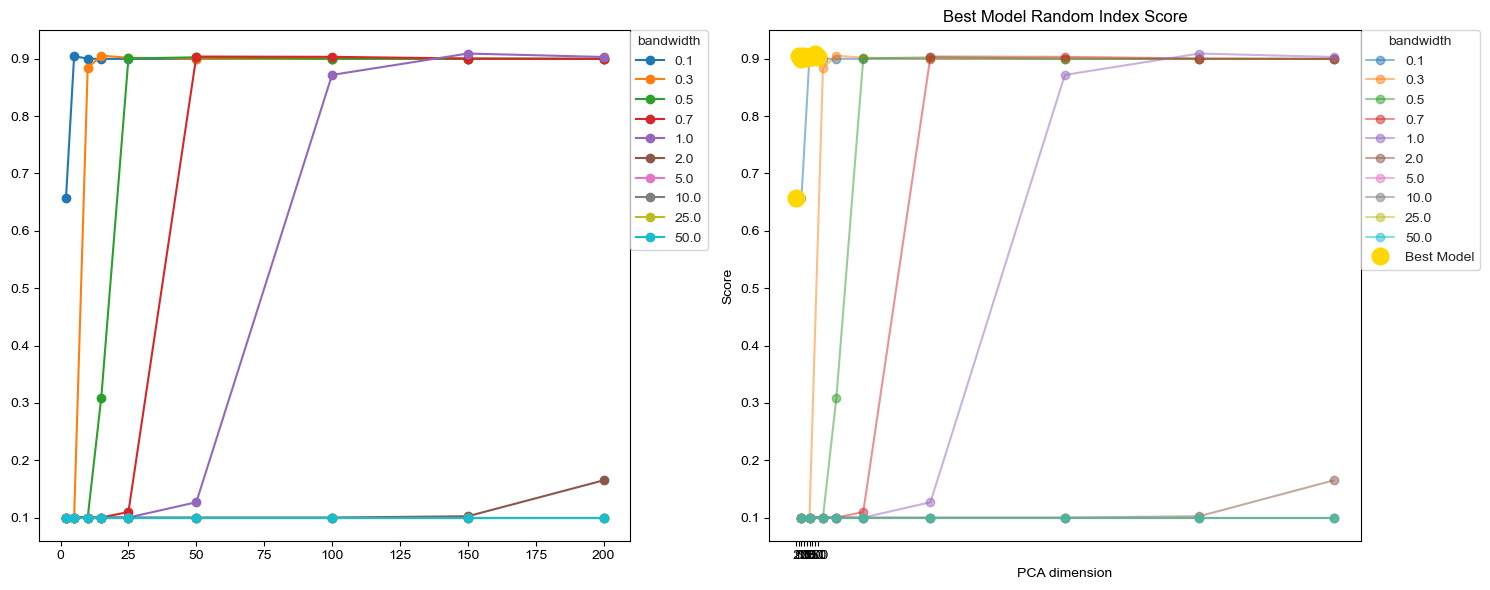

In [8]:
mean_shift_evaluation.plot_score_with_highlight(save=True)

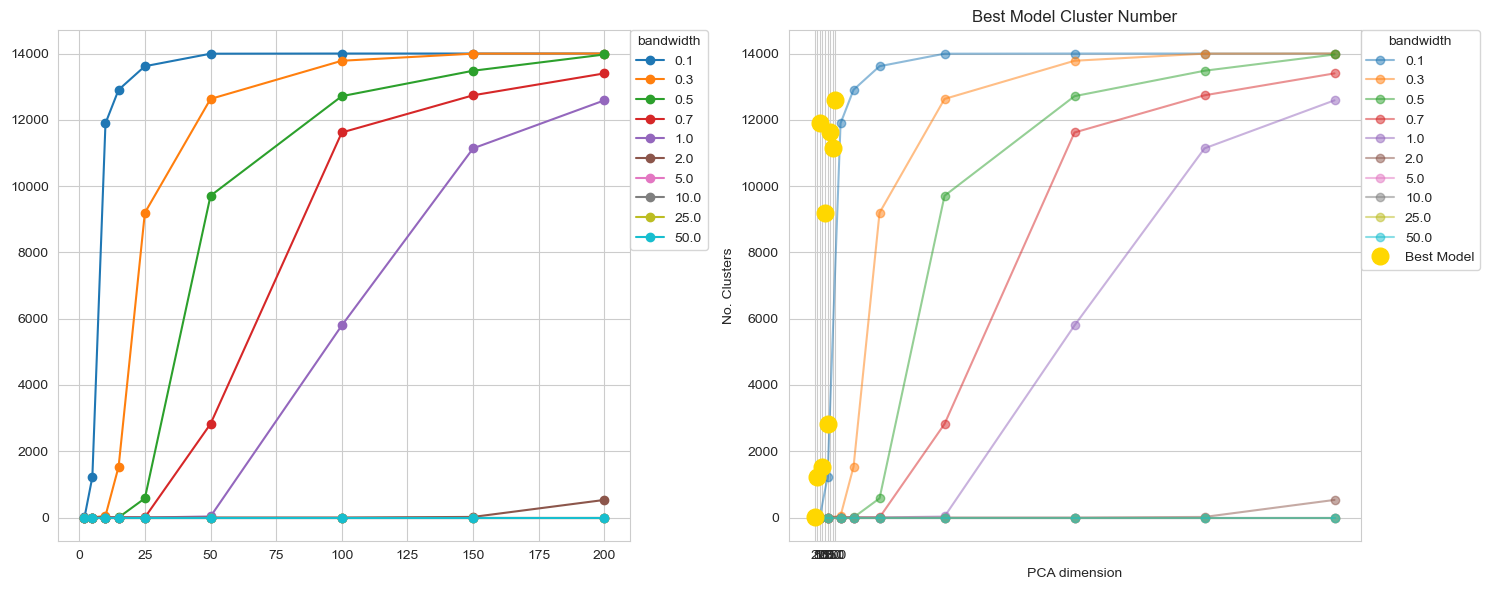

In [9]:
mean_shift_evaluation.plot_n_clusters_with_highlight(save=True)

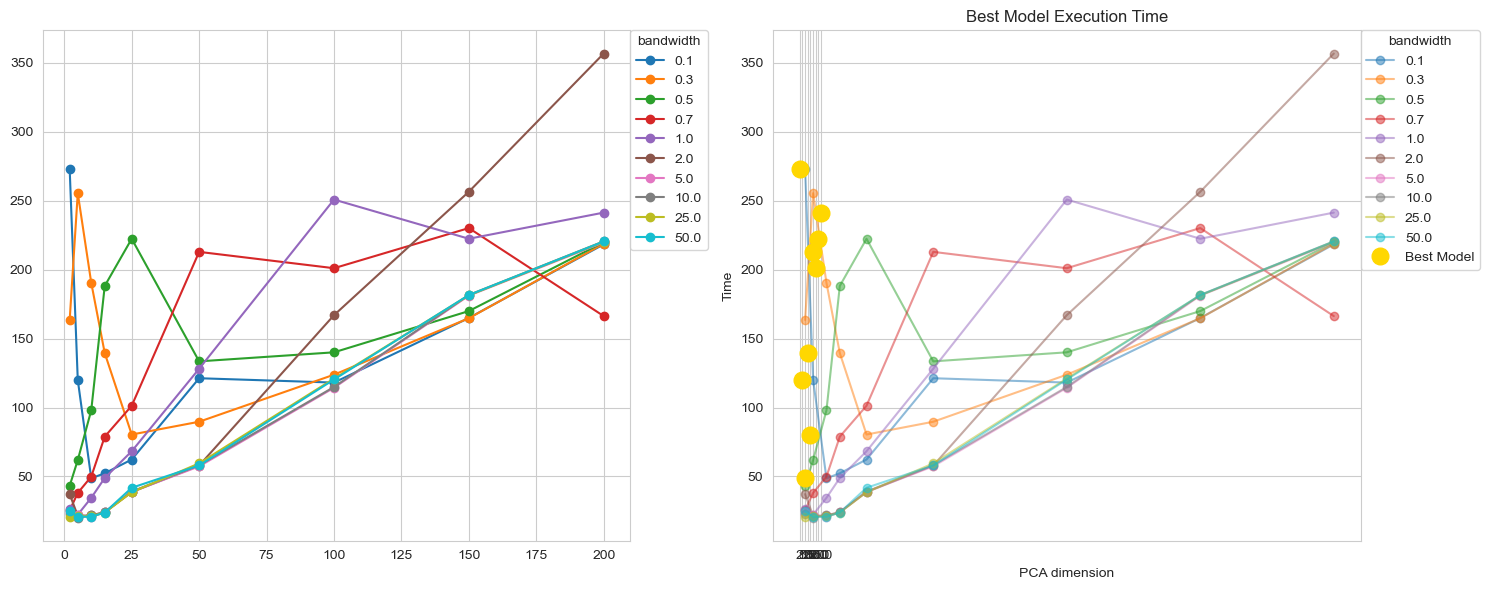

In [10]:
mean_shift_evaluation.plot_time_with_highlight(save=True)

## Best model

In [4]:
best = mean_shift_evaluation.best_model
best

MeanShift[N-rows: 14000; N-components: 50; Score: 0.9062438031287949, N-clusters: 6054] [KernelSize: 0.6] 

In [5]:
from assignment_3.clustering.model.model import DataClusterSplit

In [6]:
clusters = DataClusterSplit(data=data, index=best.out)

In [7]:
clusters

ClusterDataSplit [Data: 14000, Clusters: 6054, Mean-per-Cluster: 2.313, Score: 0.906] 

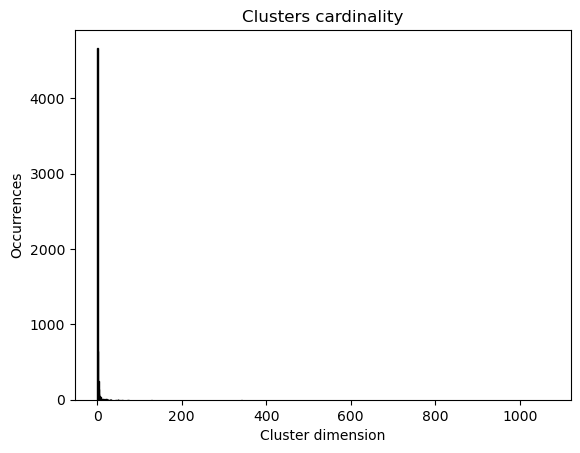

In [8]:
clusters.plot_frequencies_histo()

In [9]:
clusters_best = clusters.get_sub_clusters(a=25)

In [10]:
clusters_best

ClusterDataSplit [Data: 4187, Clusters: 49, Mean-per-Cluster: 85.449, Score: 0.887] 

In [11]:
clusters_best.rand_index_score

0.8868416347051045

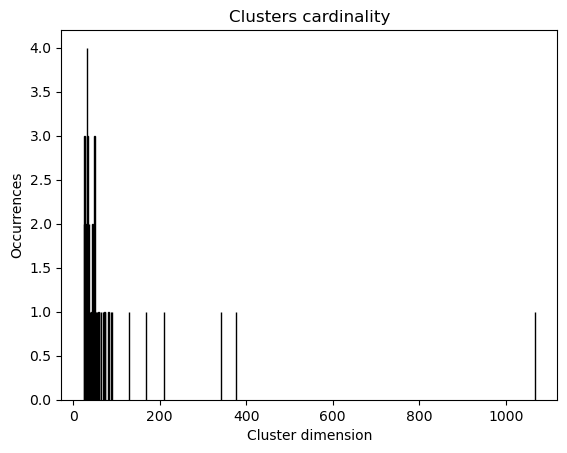

In [12]:
clusters_best.plot_frequencies_histo()

In [ ]:
clusters_best.plot_mean_digit()
# output stra lunghi porcodio

In [14]:
clusters_bad = clusters.get_sub_clusters(b=1)

In [15]:
clusters_bad

ClusterDataSplit [Data: 4669, Clusters: 4669, Mean-per-Cluster: 1.000, Score: 0.854] 

In [ ]:
clusters_bad.plot_mean_digit(sample_out=500)
# output stra lunghi porcodio